In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
print("TensorFlow v" + tf.__version__)
print("Numpy v" + np.__version__)

TensorFlow v2.15.0
Numpy v1.26.4


count    142246.000000
mean        553.636679
std         641.728770
min           3.000000
25%         248.000000
50%         411.000000
75%         654.000000
max       35375.000000
dtype: float64


141865 [246, 255, 246, 247, 248, 245, 245, 502, 580, 486]


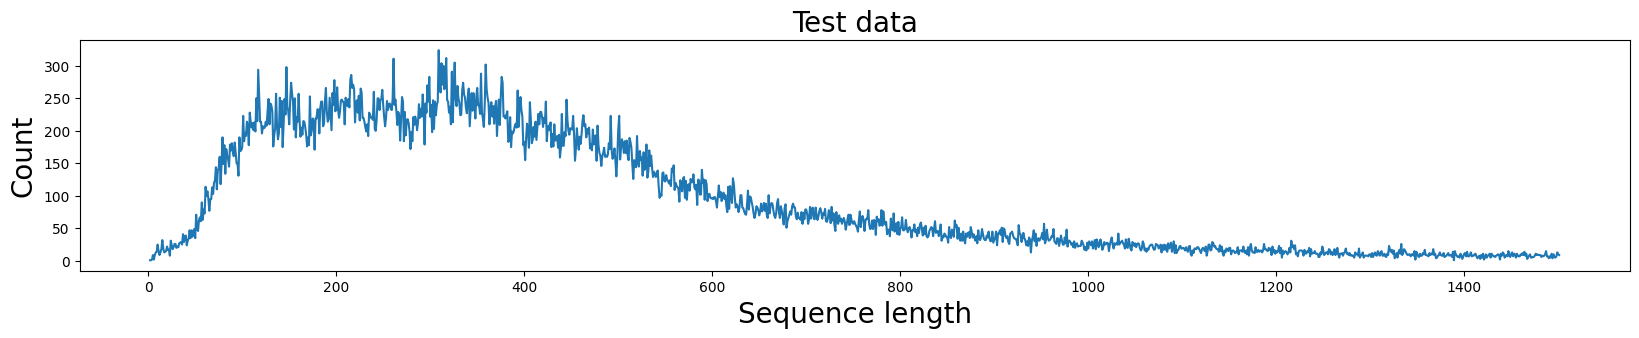

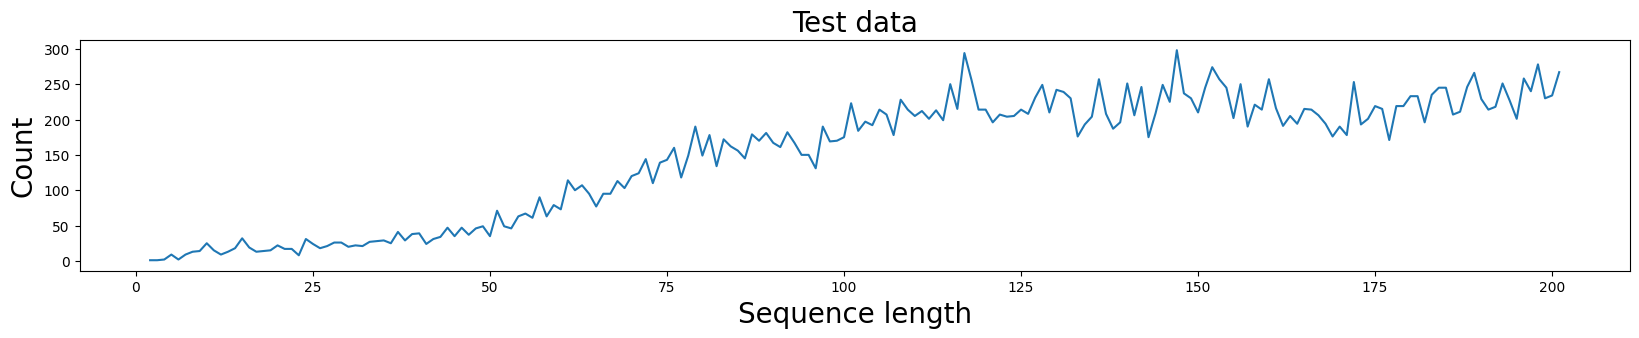

1727
CPU times: user 2.36 s, sys: 74.2 ms, total: 2.43 s
Wall time: 2.05 s


count    141865.000000
mean        477.118225
std         462.470394
min           2.000000
25%         225.000000
50%         375.000000
75%         577.000000
max       35213.000000
dtype: float64

In [5]:
%%time 
from Bio import SeqIO

fn = "dataset/Train/train_sequences.fasta"
sequences = SeqIO.parse(fn, "fasta")
l = []
for seq in sequences:
    l.append(len(seq.seq))
display(pd.Series(l).describe())
print()

fn = "dataset/Test (Targets)/testsuperset.fasta"

sequences = SeqIO.parse(fn, "fasta")
list_seq_id_test = [seq.id for seq in sequences]
sequences = SeqIO.parse(fn, "fasta")
list_seq_len = [len(seq.seq) for seq in sequences]
print(len(list_seq_len), list_seq_len[:10])
sr = pd.Series(list_seq_len).value_counts().sort_index()
fig = plt.figure(figsize=(20, 3))
plt.plot(sr.head(1500))
plt.title("Test data", fontsize=20)
plt.xlabel("Sequence length", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.show()
fig = plt.figure(figsize=(20, 3))
plt.plot(sr.head(200))
plt.title("Test data", fontsize=20)
plt.xlabel("Sequence length", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.show()
print((np.array(list_seq_len) < 60).sum())
pd.Series(list_seq_len).describe()

0.809
2.151
17 ['Vaccinia virus (strain Copenhagen)', 'Danio rerio', 'Homo sapiens', 'Mus musculus', 'Drosophila melanogaster', 'Homo sapiens', 'Escherichia coli (strain K12)', 'Homo sapiens', 'Candida albicans (strain SC5314 / ATCC MYA-2876)', 'Caenorhabditis elegans', 'Homo sapiens', 'Drosophila melanogaster', 'Schizosaccharomyces pombe (strain 972 / ATCC 24843)', 'Schizosaccharomyces pombe (strain 972 / ATCC 24843)', 'Homo sapiens', 'Rattus norvegicus', 'Danio rerio', 'Gallus gallus', 'Homo sapiens', 'Rattus norvegicus', 'Mus musculus', 'Drosophila melanogaster', 'Homo sapiens', 'Vaccinia virus (strain Western Reserve)', 'Dictyostelium discoideum', 'Homo sapiens', 'Mus musculus', 'Homo sapiens', 'Escherichia coli (strain K12)', 'Arabidopsis thaliana']
142246 ['UNG', 'wnt11', 'VENTX', 'Arrdc4', 'Gsc', 'CD80', 'yagF', 'LAMA3', 'BST1', 'glp-1', 'RASL10B', 'CG12262', 'gle1', 'gsa1', 'WDR45B', 'Mrs2', 'myo9aa', 'ANKRD1', 'ARMC5', 'Cyp2c7', 'Acsl1', 'IntS2', 'CAPNS1', 'VACWR052', 'msp', '

count    142246.000000
mean        553.636679
std         641.728770
min           3.000000
25%         248.000000
50%         411.000000
75%         654.000000
max       35375.000000
Name: length, dtype: float64

organism
Homo sapiens                                                                                                         25125
Arabidopsis thaliana                                                                                                 14461
Mus musculus                                                                                                         14384
Danio rerio                                                                                                          12671
Drosophila melanogaster                                                                                              12020
Rattus norvegicus                                                                                                     8817
Saccharomyces cerevisiae (strain ATCC 204508 / S288c)                                                                 5469
Trypanosoma brucei brucei (strain 927/4 GUTat10.1)                                                                    5209
Caenorh

dbase
sp    83883
tr    58363
Name: count, dtype: int64


(142246, 13)


index  length                                        description  \
id                                                                              
P20536           0     218  UNG_VACCC Uracil-DNA glycosylase OS=Vaccinia v...   
O73864           1     354  WNT11_DANRE Protein Wnt-11 OS=Danio rerio OX=7...   
O95231           2     258  VENTX_HUMAN Homeobox protein VENTX OS=Homo sap...   
A0A0B4J1F4       3     415  ARRD4_MOUSE Arrestin domain-containing protein...   
P54366           4     415  GSC_DROME Homeobox protein goosecoid OS=Drosop...   
...            ...     ...                                                ...   
A0A286YAI0  142241     450  A0A286YAI0_DANRE Macrophage receptor with coll...   
A0A1D5NUC4  142242     643  A0A1D5NUC4_CHICK Mitogen-activated protein kin...   
Q5RGB0      142243     448  Q5RGB0_DANRE Potassium channel, subfamily K, m...   
A0A2R8QMZ5  142244     459  A0A2R8QMZ5_DANRE Myocyte enhancer factor 2aa O...   
A0A8I6GHU0  142245     138  A0A8I6GHU0_RAT U6 snRNA-associated Sm-like pro...   

           dbase                                           sequence  in test  \
id                                                                             
P20536        sp  MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIP...    False   
O73864        sp  MTEYRNFLLLFITSLSVIYPCTGISWLGLTINGSSVGWNQTHHCKL...     True   
O95231        sp  MRLSSSPPRGPQQLSSFGSVDWLSQSSCSGPTHTPRPADFSLGSLP...     True   
A0A0B4J1F4    sp  MGGEAGADGPRGRVKSLGLVFEDESKGCYSSGETVAGHVLLEAAEP...     True   
P54366        sp  MVETNSPPAGYTLKRSPSDLGEQQQPPRQISRSPGNTAAYHLTTAM...     True   
...          ...                                                ...      ...   
A0A286YAI0    tr  METEVDDFPGKASIFSQVNPLYSNNMKLCEAERYDFQHSEPKTMKS...    False   
A0A1D5NUC4    tr  MSAAASAEMIETPPVLNFEEIDYKEIEVEEVVGRGAFGVVCKAKWR...    False   
Q5RGB0        tr  MADKGPILTSVIIFYLSIGAAIFQILEEPNLNSAVDDYKNKTNNLL...    False   
A0A2R8QMZ5    tr  MGRKKIQITRIMDERNRQVTFTKRKFGLMKKAYELSVLCDCEIALI...    False   
A0A8I6GHU0    tr  HCISSLKLTAFFKRSFLLSPEKHLVLLRDGRTLIGFLRSIDQFANL...    False   

            fragment                            organism  taxonomyID  \
id                                                                     
P20536         False  Vaccinia virus (strain Copenhagen)       10249   
O73864         False                         Danio rerio        7955   
O95231         False                        Homo sapiens        9606   
A0A0B4J1F4     False                        Mus musculus       10090   
P54366         False             Drosophila melanogaster        7227   
...              ...                                 ...         ...   
A0A286YAI0     False                         Danio rerio        7955   
A0A1D5NUC4     False                       Gallus gallus        9031   
Q5RGB0         False                         Danio rerio        7955   
A0A2R8QMZ5     False                         Danio rerio        7955   
A0A8I6GHU0     False                   Rattus norvegicus       10116   

           gene name gene name lower  sequence version  protein existence  
id                                                                         
P20536           UNG             ung                 1                  1  
O73864         wnt11           wnt11                 1                  2  
O95231         VENTX           ventx                 1                  1  
A0A0B4J1F4    Arrdc4          arrdc4                 1                  1  
P54366           Gsc             gsc                 2                  2  
...              ...             ...               ...                ...  
A0A286YAI0     marco           marco                 1                  4  
A0A1D5NUC4    MAP3K7          map3k7                 1                  3  
Q5RGB0        kcnk5b          kcnk5b                 1                  3  
A0A2R8QMZ5    mef2aa          mef2aa                 1                  4  
A0A8I6GHU0      Lsm1            lsm1                 1               

fragment
False    134009
True       8237
Name: count, dtype: int64



gene name lower
ank2      98
dscam1    79
polg      71
gh        53
neb       41
Name: count, dtype: int64

organism
Homo sapiens               67
Drosophila melanogaster    23
Rattus norvegicus           7
Mus musculus                1
Name: count, dtype: int64


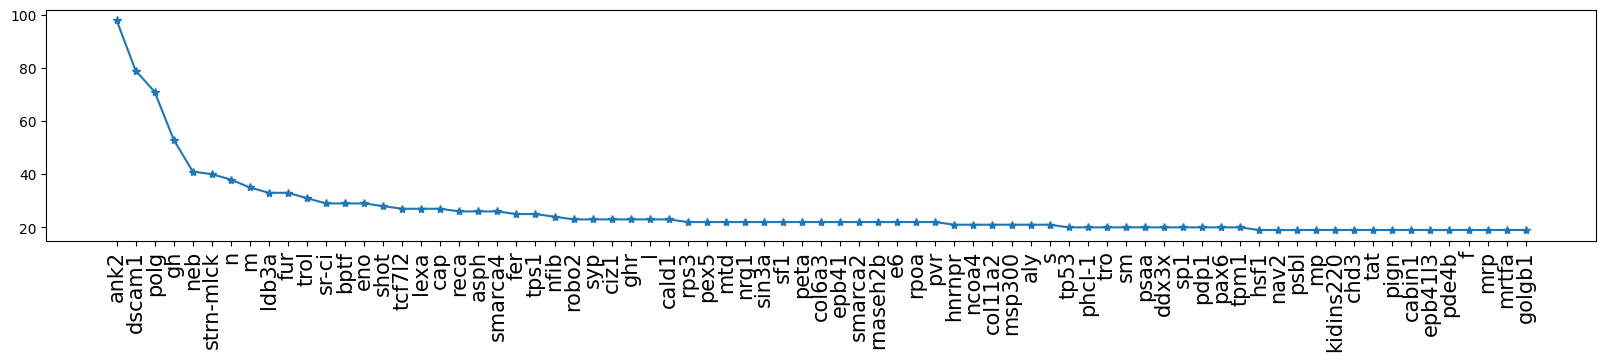

count    78493.000000
mean         1.812213
std          1.965690
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         98.000000
Name: count, dtype: float64

In [6]:
from Bio import SeqIO
import time

t0 = time.time()
fn = "dataset/Train/train_sequences.fasta"
sequences = SeqIO.parse(fn, "fasta")
l1 = []
l2 = []
l3 = []
l4 = []
l5 = []
for seq in sequences:
    #     df_seq.loc[IX, 'id'] =
    l1.append(seq.id)
    #     df_seq.loc[IX, 'length'] =
    l2.append(len(seq.seq))
    #     df_seq.loc[IX, 'description'] =
    l3.append(seq.description.split("|")[-1])
    #     df_seq.loc[IX, 'dbase'] =
    l4.append(seq.description.split(" ")[1].split("|")[0])
    #     df_seq.loc[IX, 'sequence'] =
    l5.append(str(seq.seq))
#     IX += 1

print("%.3f" % (time.time() - t0))

df_seq = pd.DataFrame(data=[l1, l2, l3, l4, l5]).T
print("%.3f" % (time.time() - t0))
df_seq.columns = ["id", "length", "description", "dbase", "sequence"]
df_seq["length"] = df_seq["length"].astype(int)
df_seq = df_seq.reset_index()
df_seq = df_seq.set_index("id")

# ------------------------ Fragment -------------------------------------------------

df_seq["in test"] = df_seq.index.isin(list_seq_id_test)


# ------------------------ Fragment -------------------------------------------------

l = ["Fragment".lower() in t.lower() for t in l3]
df_seq["fragment"] = l


# ------- organism - extracted from "OX" (if no - from the second term) --------------------------------
l = []
for t in l3:
    if "OS=" in t:
        s = t.split("OS=")[1].split("OX=")[0]
        if s[-1] == " ":
            s = s[:-1]
    elif "HUMAN" in t:  # Manually checked that only for humans it can happen
        s = "Homo sapiens"
    else:
        # that cannot happen - manually checked
        print("Problem !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
        s = t.split("_")[1].split(" ")[0]
    l.append(s)
df_seq["organism"] = l
print(len(s), l[:30])

# ------- organism symbol ------------ ----------------
# Fails on : 'CAB85509.1 OS=Arabidopsis thaliana OX=3702 GN=F8F6_100 PE=4 SV=1'
# df_seq['organism symbol'] = [t.split(' ')[0].split('_')[1] if '_' in t else 'None' for t in l3 ]
# print(len(s), l[:30])


# ------- organism taxon id ---------------- ----------------
fn = "dataset/Train/train_taxonomy.tsv"
df = pd.read_csv(fn, sep="\t", index_col=0)
df_seq = df_seq.join(df, how="left")


# ---------------- gene ------------------------------------------------------------------------------------------------
l = []
ll = []
for t in l3:
    if "GN=" in t:
        s = t.split("GN=")[-1].split(" ")[0]
    else:
        s = t.split("_")[0]
    l.append(s)
    ll.append(s.lower())
print(len(l), l[:30])
df_seq["gene name"] = l
df_seq["gene name lower"] = ll


# ---------------- PE SV ------------------------------------------------------------------------------------------------
l = [int(t.split("SV=")[-1]) if "SV=" in t else 0 for t in l3]
df_seq["sequence version"] = l

l = [int(t.split("PE=")[1].split(" ")[0]) if "PE=" in t else 0 for t in l3]
df_seq["protein existence"] = l


# ---------------- Some analysis ------------------------------------------------------------------------------------------------

print(df_seq.shape)
display(df_seq["length"].describe())
print()
display(df_seq["organism"].value_counts().head(30))
print()
display(df_seq["dbase"].value_counts().head(30))
print()
print(df_seq.shape)
display(df_seq)

print(df_seq["fragment"].value_counts())
df_seq.groupby("fragment")["length"].mean()

# ------------------ Brief Look on frequent genes ----------------------------
print()
v = df_seq["gene name lower"].value_counts()
display(v.head(5))
m = df_seq["gene name lower"] == "ank2"
print(df_seq[m]["organism"].value_counts())
fig = plt.figure(figsize=(20, 3))
ax = plt.plot(v.iloc[0:75], "*-")
plt.xticks(rotation=90, fontsize=15)
plt.show()
v.describe()

In [7]:
df_seq.loc["A0A8I6GHU0", "description"]

'A0A8I6GHU0_RAT U6 snRNA-associated Sm-like protein LSm1 OS=Rattus norvegicus OX=10116 GN=Lsm1 PE=3 SV=1'

In [8]:
df_seq["protein existence"].value_counts()

protein existence
1    85719
2    25663
3    15401
4    15290
5      170
0        3
Name: count, dtype: int64

In [9]:
df_seq["sequence version"].value_counts()

sequence version
1     106753
2      25025
3       7747
4       1973
5        332
8        246
6        107
9         31
7         24
10         5
0          3
Name: count, dtype: int64

In [10]:
df_seq["fragment"].value_counts()

fragment
False    134009
True       8237
Name: count, dtype: int64

In [11]:
df_seq["in test"].value_counts()

in test
True     73653
False    68593
Name: count, dtype: int64

In [12]:
m = df_seq["organism"] == "Homo sapiens"
print(m.sum())
df_seq[m]["gene name lower"].nunique()
df_seq[m].groupby("gene name lower")["gene name lower"].count().sort_values(
    ascending=False
).head(20)

25125


gene name lower
ank2        67
rnaseh2b    21
smarca4     20
pax6        18
pign        18
ddx3x       17
nfib        15
dnajc7      14
tpm1        14
psen1       14
atxn2       13
fhl1        13
bin1        13
elp4        13
tmbim1      13
chd4        13
racgap1     13
pabpc1      13
enpep       12
epb41       12
Name: gene name lower, dtype: int64

gene name lower
ank2      98
dscam1    79
polg      71
gh        53
neb       41
Name: count, dtype: int64

organism
Homo sapiens               67
Drosophila melanogaster    23
Rattus norvegicus           7
Mus musculus                1
Name: count, dtype: int64


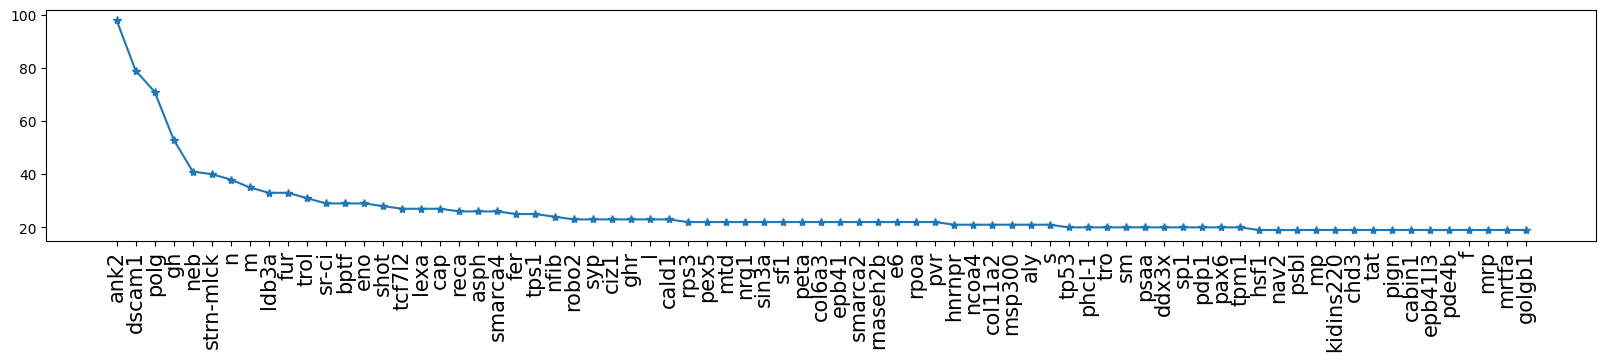

count    78493.000000
mean         1.812213
std          1.965690
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         98.000000
Name: count, dtype: float64

In [13]:
print()
v = df_seq["gene name lower"].value_counts()
display(v.head(5))
m = df_seq["gene name lower"] == "ank2"
print(df_seq[m]["organism"].value_counts())
fig = plt.figure(figsize=(20, 3))
ax = plt.plot(v.iloc[0:75], "*-")
plt.xticks(rotation=90, fontsize=15)
plt.show()
v.describe()

In [14]:
print((v == 1).sum(), (v == 2).sum())
for t in range(1, 20):
    print(t, (v >= t).sum())

55090 9782
1 78493
2 23403
3 13621
4 8350
5 5411
6 3631
7 2462
8 1734
9 1218
10 904
11 646
12 491
13 354
14 285
15 214
16 174
17 135
18 105
19 83


In [15]:
pd.set_option("max_colwidth", 200)
pd.set_option("display.max_rows", 100)

In [16]:
df_seq.columns

Index(['index', 'length', 'description', 'dbase', 'sequence', 'in test',
       'fragment', 'organism', 'taxonomyID', 'gene name', 'gene name lower',
       'sequence version', 'protein existence'],
      dtype='object')

In [17]:
m = df_seq['gene name lower'] == 'ank2'
print(m.sum())
m2 = df_seq['organism'] == 'Homo sapiens'
print((m & m2).sum())
dict(df_seq[m & m2]['description'])
df_seq[m & m2][['index', 'length', 'description', 'dbase',  'organism',
                'taxonomyID', 'gene name', 'gene name lower', 'in test']].head(100)

98
67


index  length  \
id                           
Q01484       15692    3957   
A0A5F9ZHT4   84840    3870   
A0A5F9ZGS7   85060    1827   
A0A5F9ZGS5   88666    1871   
A0A5F9ZH35   90486    1758   
A0A5F9ZH39   91029    1887   
A0A5F9ZH10   93730    1005   
A0A5F9ZGX3   95675    3972   
A0A5F9ZHE2   96688    1806   
A0A5F9ZGY1   97660    1887   
A0A5K1VW73   98875     683   
A0A5F9ZHA1   99292    1849   
H0Y8Y2       99650    1062   
A0A5F9ZI81   99657    1915   
A0A5F9ZHN5   99795    3903   
D6RHE1      100207    3961   
I6L894      101357    3924   
A0A5F9ZI16  103347    1055   
A0A5F9ZH34  103931    1689   
A0A5F9ZH99  105141    1060   
A0A5F9ZHL3  105434    1858   
A0A5F9ZGY3  106016    3934   
A0A5F9ZHD2  106036    3936   
A0A5F9ZHC9  106551    1910   
A0A5F9ZGZ1  107354    1943   
A0A5F9ZI18  107838    1879   
A0A5F9ZHN0  108158    1777   
A0A5F9ZHJ6  108307    1851   
A0A5F9ZHQ5  108755    1894   
A0A5F9ZI15  110180    1768   
A0A5F9ZHV4  111306    1001   
A0A5F9ZHE4  111731    3964   
A0A5F9ZHJ4  112091    1818   
A0A5F9ZHQ3  112182    1838   
A0A5F9ZH17  112299    1879   
A0A5F9ZHT8  112688    3891   
A0A5F9ZHL9  113412    1817   
A0A5F9ZHR2  113555    1810   
A0A5F9ZI65  114214    3879   
A0A5F9ZI56  114353    1882   
A0A5F9ZHF7  114470    3862   
A0A5F9ZHG3  115194    1891   
A0A5F9ZH70  115711    1931   
A0A5F9ZH03  117109    1785   
A0A5F9ZH38  118757    1739   
A0A5F9ZI08  121021    1797   
A0A5F9ZI69  121771    1839   
A0A5F9ZHL5  121871    1872   
A0A5F9ZI46  122046    3882   
H0Y931      124025     966   
A0A5F9ZHR8  124376    3939   
A0A5F9ZI30  124607    3820   
A0A5F9ZH18  124729    1109   
A0A5F9ZGX8  125498    1830   
E9PCH6      125936    1048   
A0A5F9ZI73  126065    1822   
A0A5F9ZH30  126246    3995   
A0A5F9ZGY4  126809    3848   
A0A5F9ZH58  126922    1770   
A0A5F9ZGZ5  127368    3874   
A0A5F9ZHS1  127903    3984   
A0A5F9ZI40  134834    3915   
A0A5F9ZI36  136141    1846   
A0A5F9ZHY6  136974    1763   
A0A5F9ZI53  137919    1755   
A0A5F9ZHM6  139164    1708   
A0A5F9ZH19  142096    3895   

                                                                                              description  \
id                                                                                                          
Q01484                                     ANK2_HUMAN Ankyrin-2 OS=Homo sapiens OX=9606 GN=ANK2 PE=1 SV=4   
A0A5F9ZHT4                           A0A5F9ZHT4_HUMAN Ankyrin-2 OS=Homo sapiens OX=9606 GN=ANK2 PE=1 SV=1   
A0A5F9ZGS7                           A0A5F9ZGS7_HUMAN Ankyrin-2 OS=Homo sapiens OX=9606 GN=ANK2 PE=1 SV=1   
A0A5F9ZGS5                           A0A5F9ZGS5_HUMAN Ankyrin-2 OS=Homo sapiens OX=9606 GN=ANK2 PE=1 SV=1   
A0A5F9ZH35                           A0A5F9ZH35_HUMAN Ankyrin-2 OS=Homo sapiens OX=9606 GN=ANK2 PE=1 SV=1   
A0A5F9ZH39                           A0A5F9ZH39_HUMAN Ankyrin-2 OS=Homo sapiens OX=9606 GN=ANK2 PE=1 SV=1   
A0A5F9ZH10                           A0A5F9ZH10_HUMAN Ankyrin-2 OS=Homo sapiens OX=9606 GN=ANK2 PE=1 SV=1   
A0A5F9ZGX3                           A0A5F9ZGX3_HUMAN Ankyrin-2 OS=Homo sapiens OX=9606 GN=ANK2 PE=1 SV=1   
A0A5F9ZHE2                           A0A5F9ZHE2_HUMAN Ankyrin-2 OS=Homo sapiens OX=9606 GN=ANK2 PE=1 SV=1   
A0A5F9ZGY1                           A0A5F9ZGY1_HUMAN Ankyrin-2 OS=Homo sapiens OX=9606 GN=ANK2 PE=1 SV=1   
A0A5K1VW73                A0A5K1VW73_HUMAN Ankyrin-2 (Fragment) OS=Homo sapiens OX=9606 GN=ANK2 PE=1 SV=2   
A0A5F9ZHA1                           A0A5F9ZHA1_HUMAN Ankyrin-2 OS=Homo sapiens OX=9606 GN=ANK2 PE=1 SV=1   
H0Y8Y2                                   H0Y8Y2_HUMAN Ankyrin-2 OS=Homo sapiens OX=9606 GN=ANK2 PE=1 SV=2   
A0A5F9ZI81                           A0A5F9ZI81_HUMAN Ankyrin-2 OS=Homo sapiens OX=9606 GN=ANK2 PE=1 SV=1   
A0A5F9ZHN5                           A0A5F9ZHN5_HUMAN Ankyrin-2 OS=Homo sapiens OX=9606 GN=ANK2 PE=1 SV=1   
D6RHE1                                   D6RHE1_HUMAN Ankyrin-2 OS=Homo sapiens OX=9606 G

In [18]:
m = df_seq['length'] < 60
print(m.sum())

1863


In [19]:
m = df_seq['length'] < 10
print(df_seq[m].index.tolist())
print(df_seq[m]['gene name'].tolist())

['P84814', 'P83318', 'P86300', 'P83277', 'P84866', 'P86010', 'P86168', 'P86707', 'P86569', 'P84761', 'C0HJB2', 'P84700', 'C0HLM4', 'P83281', 'B3EWG7', 'P85002', 'P84834', 'P83308', 'P86587', 'P83276', 'P83319', 'P41495', 'P84701', 'C0HLT7', 'P84678', 'P86299', 'P84774', 'P83661', 'P0DJJ6', 'P86705', 'Q9T2K9', 'P86563', 'P84831', 'P86489', 'P86012', 'P86582', 'P83279', 'P86492', 'P86557', 'P84773', 'P84822', 'P84677', 'C0HKA9', 'P86575', 'P86494', 'P85069', 'P86298', 'P86487', 'P85003', 'P82858', 'P84825', 'P83222', 'P86302', 'P84683', 'P86594', 'P83275', 'P83316', 'C0HKA8', 'P84760', 'P83320', 'P83274', 'Q47505', 'P84829', 'Q9T2L1', 'P84759', 'P85067', 'P84833', 'Q9T2L0', 'P86301', 'P86922', 'P86482', 'P0DKJ0', 'C4MRC6', 'A0A0U1RNE4', 'Q7LZJ8', 'A0A1Y7AKU3', 'Q3YNA4', 'A0A0R4IAH1', 'A0A0J9YIY0', 'A0A1L1SSW0']
['OPIP1', 'FAR3', 'TLP3', 'FAR4', 'PLEUR', 'CUTI1', 'COLUA', 'AMP3', 'TRP1', 'ACI', 'LAC', 'CONO', 'CARP', 'FAR8', 'PERO', 'CYCLF', 'TY2', 'FARP', 'TRP1', 'FAR3', 'FAR4', 'TMOF', 

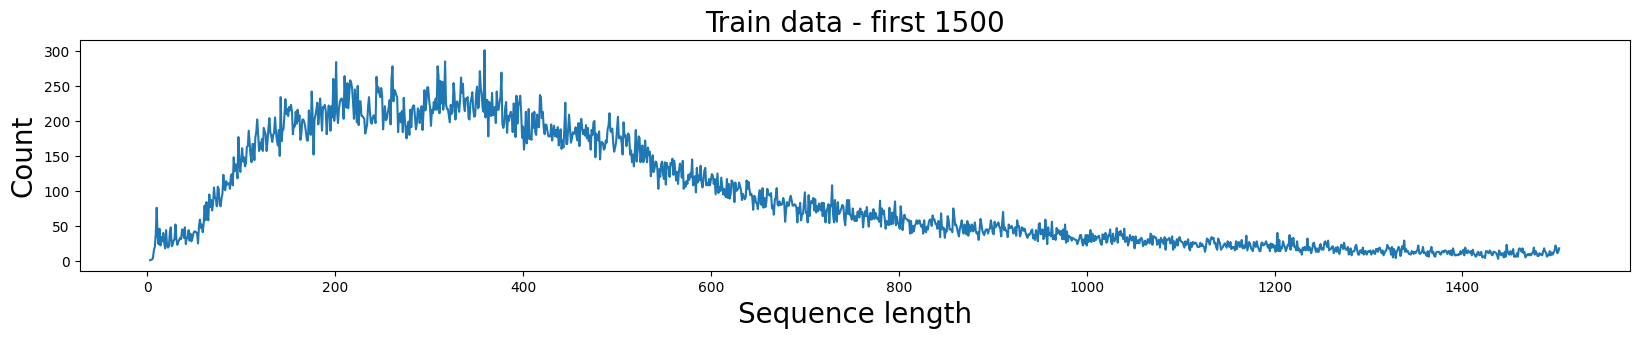

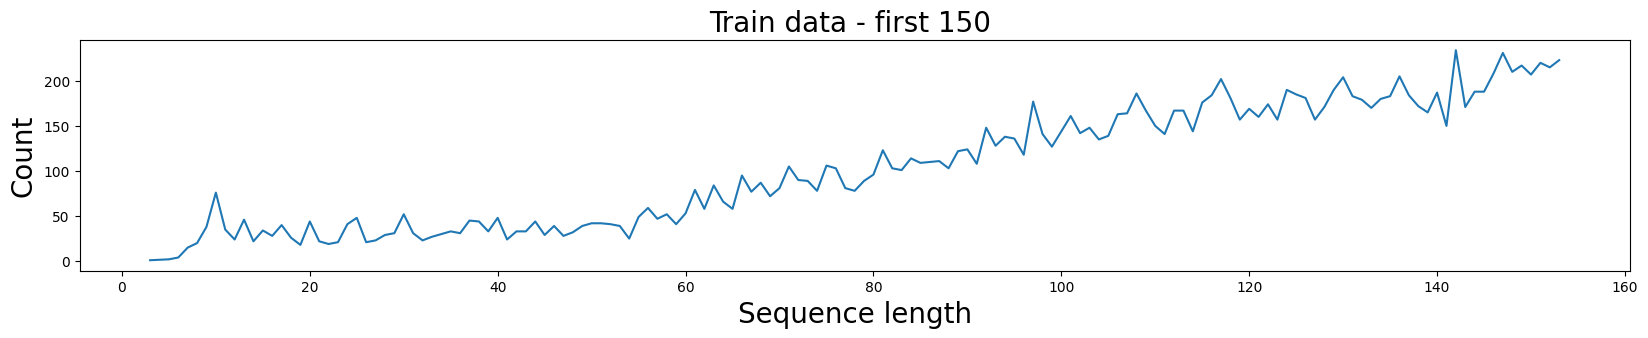

count length < 60 :  1863


In [20]:
sr = df_seq["length"].value_counts().sort_index()

fig = plt.figure(figsize=(20, 3))
plt.plot(sr.head(1500))
plt.title("Train data - first 1500", fontsize=20)
plt.xlabel("Sequence length", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.show()

fig = plt.figure(figsize=(20, 3))
plt.plot(sr.head(150))
plt.title("Train data - first 150 ", fontsize=20)
plt.xlabel("Sequence length", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.show()

m = df_seq["length"] < 60
print("count length < 60 : ", m.sum())

In [21]:
for k in range(8):
    m = df_seq["length"] == k
    if m.sum() == 0:
        continue
    print(k, m.sum())
    #     print(dict(df_seq2[m]['description']))
    print(dict(df_seq[m]["organism"]))
    display(df_seq[m])
    print()

3 1
{'P84761': 'Macrocybe gigantea'}


index  length  \
id                      
P84761  10118       3   

                                                                                                    description  \
id                                                                                                                
P84761  ACI_MACGN Angiotensin-1-converting enzyme inhibitory peptide OS=Macrocybe gigantea OX=1491104 PE=1 SV=1   

       dbase sequence  in test  fragment            organism  taxonomyID  \
id                                                                         
P84761    sp      GEP    False     False  Macrocybe gigantea     1491104   

       gene name gene name lower  sequence version  protein existence  
id                                                                     
P84761       ACI             aci                 1                  1


5 2
{'P83308': 'Gallus gallus', 'P0DKJ0': 'Arabidopsis thaliana'}


index  length  \
id                      
P83308  18841       5   
P0DKJ0  82641       5   

                                                                                            description  \
id                                                                                                        
P83308                        FARP_CHICK FMRFamide-like neuropeptide OS=Gallus gallus OX=9031 PE=1 SV=1   
P0DKJ0  P160B_ARATH Peptide encoded by miPEP160b OS=Arabidopsis thaliana OX=3702 GN=miPEP160b PE=4 SV=1   

       dbase sequence  in test  fragment              organism  taxonomyID  \
id                                                                           
P83308    sp    LPLRF     True     False         Gallus gallus        9031   
P0DKJ0    sp    MFSPQ     True     False  Arabidopsis thaliana        3702   

        gene name gene name lower  sequence version  protein existence  
id                                                                      
P83308       FARP            farp                 1                  1  
P0DKJ0  miPEP160b       mipep160b                 1                  4


6 4
{'P41495': 'Sarcophaga bullata', 'P86012': 'Colletotrichum kahawae', 'P85003': 'Annona cherimola', 'P84833': 'Ascaphus truei'}


index  length  \
id                      
P41495  24528       6   
P86012  38455       6   
P85003  51157       6   
P84833  78121       6   

                                                                                  description  \
id                                                                                              
P41495  TMOF_SARBU Trypsin-modulating oostatic factor OS=Sarcophaga bullata OX=7385 PE=1 SV=1   
P86012         CUTI2_COLKA Cutinase 2 (Fragment) OS=Colletotrichum kahawae OX=34407 PE=1 SV=1   
P85003                      CYCLE_ANNCH Cyclopeptide E OS=Annona cherimola OX=49314 PE=1 SV=1   
P84833                          TY3_ASCTR Tryptophyllin-3 OS=Ascaphus truei OX=8439 PE=1 SV=1   

       dbase sequence  in test  fragment                organism  taxonomyID  \
id                                                                             
P41495    sp   NPTNLH    False     False      Sarcophaga bullata        7385   
P86012    sp   DINGGA    False      True  Colletotrichum kahawae       34407   
P85003    sp   PGLGFY    False     False        Annona cherimola       49314   
P84833    sp   DPWDWV    False     False          Ascaphus truei        8439   

       gene name gene name lower  sequence version  protein existence  
id                                                                     
P41495      TMOF            tmof                 1                  1  
P86012     CUTI2           cuti2                 1                  1  
P85003     CYCLE           cycle                 1                  1  
P84833       TY3             ty3                 1                  1


7 15
{'P86010': 'Colletotrichum kahawae', 'P86168': 'Colletotrichum dematium', 'C0HLM4': 'Rhizopus azygosporus', 'P84831': 'Ascaphus truei', 'P86489': 'Litoria peronii', 'P86492': 'Litoria peronii', 'P86494': 'Litoria peronii', 'P86298': 'Phoneutria nigriventer', 'P86487': 'Litoria peronii', 'P83274': 'Macrobrachium rosenbergii', 'Q47505': 'Escherichia coli', 'P85067': 'Sepia officinalis', 'P86482': 'Litoria peronii', 'A0A0U1RNE4': 'Danio rerio', 'A0A1Y7AKU3': 'Danio rerio'}


index  length  \
id                           
P86010        6376       7   
P86168        7091       7   
C0HLM4       12329       7   
P84831       36219       7   
P86489       38244       7   
P86492       39847       7   
P86494       44686       7   
P86298       45877       7   
P86487       47188       7   
P83274       66744       7   
Q47505       68961       7   
P85067       76966       7   
P86482       82007       7   
A0A0U1RNE4   93704       7   
A0A1Y7AKU3  112897       7   

                                                                                                                  description  \
id                                                                                                                              
P86010                                         CUTI1_COLKA Cutinase 1 (Fragment) OS=Colletotrichum kahawae OX=34407 PE=1 SV=1   
P86168                                     COLUA_COLDE Colutellin-A (Fragments) OS=Colletotrichum dematium OX=34405 PE=1 SV=1   
C0HLM4                                        CARP_RHIAZ Rhizopuspepsin (Fragment) OS=Rhizopus azygosporus OX=86630 PE=1 SV=1   
P84831                                                          TY1_ASCTR Tryptophyllin-1 OS=Ascaphus truei OX=8439 PE=1 SV=1   
P86489                                                         PE12_LITPE Peroniin-1.2 OS=Litoria peronii OX=317363 PE=1 SV=1   
P86492                                                         PE13_LITPE Peroniin-1.3 OS=Litoria peronii OX=317363 PE=1 SV=1   
P86494                                                         PE14_LITPE Peroniin-1.4 OS=Litoria peronii OX=317363 PE=1 SV=1   
P86298                                       TLP1_PHONI Tachykinin-like peptide-I OS=Phoneutria nigriventer OX=6918 PE=1 SV=1   
P86487                                                         PE11_LITPE Peroniin-1.1 OS=Litoria peronii OX=317363 PE=1 SV=1   
P83274                            FAR1_MACRS FMRFamide-like neuropeptide FLP1 OS=Macrobrachium rosenbergii OX=79674 PE=1 SV=1   
Q47505                                                   MCCC7_ECOLX Microcin C7 OS=Escherichia coli OX=562 GN=mccA PE=1 SV=1   
P85067                                              OJP1_SEPOF Ovarian jelly-peptide 1 OS=Sepia officinalis OX=6610 PE=1 SV=1   
P86482                                                         PE15_LITPE Peroniin-1.5 OS=Litoria peronii OX=317363 PE=1 SV=1   
A0A0U1RNE4  A0A0U1RNE4_DANRE Carnitine palmitoyltransferase 1Aa (liver) (Fragment) OS=Danio rerio OX=7955 GN=cpt1aa PE=4 SV=2   
A0A1Y7AKU3                         A0A1Y7AKU3_DANRE Reticulon 4 receptor (Fragment) OS=Danio rerio OX=7955 GN=rtn4r PE=4 SV=1   

           dbase sequence  in test  fragment                   organism  \
id                                                                        
P86010        sp  VIYIFAR    False      True     Colletotrichum kahawae   
P86168        sp  VISIIPV    False      True    Colletotrichum dematium   
C0HLM4        sp  AGVGTVP    False      True       Rhizopus azygosporus   
P84831        sp  GPIPWQR    False     False             Ascaphus truei   
P86489        sp  QPWIPFV    False     False            Litoria peronii   
P86492        sp  QPWLPFV    False     False            Litoria peronii   
P86494        sp  QTWLPFV    False     False            Litoria peronii   
P86298        sp  QKKDKKD    False     False     Phoneutria nigriventer   
P86487        sp  QPWLPFG    False     False            Litoria peronii   
P83274        sp  DRNFLRF    False     False  Macrobrachium rosenbergii   
Q47505        sp  MRTGNAN    False     False           Escherichia coli   
P85067        sp  DQVKIVL    False     False          Sepia officinalis   
P86482        sp  QPWLPFR    False     False            Litoria peronii   
A0A0U1RNE4    tr  MAEAHQA    False      True                Danio rerio   
A0A1Y7AKU3    tr  MKTLIVE    False      True                Danio rerio   

            taxonomyID gene name

In [26]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [27]:
numerics = ["bool", "float", "int16", "int32", "int64", "float16", "float32", "float64"]
df.select_dtypes(include=numerics)
newdf = pd.concat(
    [df_seq.select_dtypes("number"), df_seq.select_dtypes("bool")], axis=1
)
newdf
display(newdf.corr().round(1))
display(newdf[["index", "protein existence", "in test", "fragment"]].corr().round(1))
sns.clustermap(newdf.corr().abs())

plt.show()

index  length  taxonomyID  sequence version  \
index                1.0     0.0        -0.1              -0.2   
length               0.0     1.0        -0.0               0.1   
taxonomyID          -0.1    -0.0         1.0              -0.1   
sequence version    -0.2     0.1        -0.1               1.0   
protein existence    0.4     0.0         0.1              -0.1   
in test             -0.7    -0.0         0.0               0.2   
fragment             0.2    -0.1        -0.1              -0.0   

                   protein existence  in test  fragment  
index                            0.4     -0.7       0.2  
length                           0.0     -0.0      -0.1  
taxonomyID                       0.1      0.0      -0.1  
sequence version                -0.1      0.2      -0.0  
protein existence                1.0     -0.4       0.1  
in test                         -0.4      1.0      -0.2  
fragment                         0.1     -0.2       1.0

index  protein existence  in test  fragment
index                1.0                0.4     -0.7       0.2
protein existence    0.4                1.0     -0.4       0.1
in test             -0.7               -0.4      1.0      -0.2
fragment             0.2                0.1     -0.2       1.0

RuntimeError: clustermap requires scipy to be available

In [28]:
fn = "dataset/Train/train_terms.tsv"
df = pd.read_csv(fn, sep="\t")
print(df.shape)
display(df)
sr2 = df.groupby("EntryID")["term"].apply(lambda x: len(list(x)))
sr2.name = "Terms Count"
print(sr2.shape)
display(sr2.head(2))

df_seq2 = df_seq.join(sr2, how="left")
print(df_seq2.shape)
display(df_seq2.head(2))

# df_seq.select_dtypes('number').corr()
# numerics = ['bool','float',  'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df.select_dtypes(include=numerics)
newdf = pd.concat(
    [df_seq2.select_dtypes("number"), df_seq2.select_dtypes("bool")], axis=1
)
newdf
display(newdf.corr().round(1))
# display(newdf[['index', 'protein existence' ,'in test','fragment']].corr().round(1))
sns.clustermap(newdf.corr().abs())
plt.show()

(5363863, 3)


EntryID        term aspect
0        A0A009IHW8  GO:0008152    BPO
1        A0A009IHW8  GO:0034655    BPO
2        A0A009IHW8  GO:0072523    BPO
3        A0A009IHW8  GO:0044270    BPO
4        A0A009IHW8  GO:0006753    BPO
...             ...         ...    ...
5363858      X5L565  GO:0050649    MFO
5363859      X5L565  GO:0016491    MFO
5363860      X5M5N0  GO:0005515    MFO
5363861      X5M5N0  GO:0005488    MFO
5363862      X5M5N0  GO:0003674    MFO

[5363863 rows x 3 columns]

(142246,)


EntryID
A0A009IHW8    49
A0A021WW32    77
Name: Terms Count, dtype: int64

(142246, 14)


index  length  \
id                      
P20536      0     218   
O73864      1     354   

                                                                                             description  \
id                                                                                                         
P20536  UNG_VACCC Uracil-DNA glycosylase OS=Vaccinia virus (strain Copenhagen) OX=10249 GN=UNG PE=1 SV=1   
O73864                              WNT11_DANRE Protein Wnt-11 OS=Danio rerio OX=7955 GN=wnt11 PE=2 SV=1   

       dbase  \
id             
P20536    sp   
O73864    sp   

                                                                                                                                                                                                       sequence  \
id                                                                                                                                                                                                                
P20536  MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIPDKFFIQLKQPLRNKRVCVCGIDPYPKDGTGVPFESPNFTKKSIKEIASSISRLTGVIDYKGYNLNIIDGVIPWNYYLSCKLGETKSHAIYWDKISKLLLQHITKHVSVLYCLGKTDFSNIRAKLESPVTTIVGYHPAARDRQFEKDRSFE...   
O73864  MTEYRNFLLLFITSLSVIYPCTGISWLGLTINGSSVGWNQTHHCKLLDGLVPDQQQLCKRNLELMHSIVRAARLTKSACTSSFSDMRWNWSSIESAPHFTPDLAKGTREAAFVVSLAAAVVSHAIARACASGDLPSCSCAAMPSEQAAPDFRWGGCGDNLRYYGLQMGSAFSDAPMRNRRSGPQDFRLMQLHNNAV...   

        in test  fragment                            organism  taxonomyID  \
id                                                                          
P20536    False     False  Vaccinia virus (strain Copenhagen)       10249   
O73864     True     False                         Danio rerio        7955   

       gene name gene name lower  sequence version  protein existence  \
id                                                                      
P20536       UNG             ung                 1                  1   
O73864     wnt11           wnt11                 1                  2   

        Terms Count  
id                   
P20536           33  
O73864          170

index  length  taxonomyID  sequence version  \
index                1.0     0.0        -0.1              -0.2   
length               0.0     1.0        -0.0               0.1   
taxonomyID          -0.1    -0.0         1.0              -0.1   
sequence version    -0.2     0.1        -0.1               1.0   
protein existence    0.4     0.0         0.1              -0.1   
Terms Count         -0.2     0.1        -0.0               0.1   
in test             -0.7    -0.0         0.0               0.2   
fragment             0.2    -0.1        -0.1              -0.0   

                   protein existence  Terms Count  in test  fragment  
index                            0.4         -0.2     -0.7       0.2  
length                           0.0          0.1     -0.0      -0.1  
taxonomyID                       0.1         -0.0      0.0      -0.1  
sequence version                -0.1          0.1      0.2      -0.0  
protein existence                1.0         -0.2     -0.4       0.1  
Terms Count                     -0.2          1.0      0.3      -0.1  
in test                         -0.4          0.3      1.0      -0.2  
fragment                         0.1         -0.1     -0.2       1.0

RuntimeError: clustermap requires scipy to be available

In [29]:
df["aspect"].value_counts()

aspect
BPO    3497732
CCO    1196017
MFO     670114
Name: count, dtype: int64

In [30]:
print(df["aspect"].unique())
for a in ["BPO", "CCO", "MFO"]:
    m = df["aspect"] == a
    sr2 = df[m].groupby("EntryID")["term"].apply(lambda x: len(list(x)))
    sr2.name = "Terms Count " + a
    sr2 = sr2.fillna(0)
    print(sr2.shape)
    #     display(sr2.head(2))

    df_seq2 = df_seq2.join(sr2, how="left")
    df_seq2[sr2.name] = df_seq2[sr2.name].fillna(0)  # df_seq.join(sr2, how = 'left')
    print(df_seq2.shape)
#     display(df_seq2.head(2))

# df_seq.select_dtypes('number').corr()
# numerics = ['bool','float',  'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df.select_dtypes(include=numerics)
newdf = pd.concat(
    [df_seq2.select_dtypes("number"), df_seq2.select_dtypes("bool")], axis=1
)
newdf
display(newdf.corr().round(1))
# display(newdf[['index', 'protein existence' ,'in test','fragment']].corr().round(1))
sns.clustermap(newdf.corr().abs())
plt.show()

['BPO' 'CCO' 'MFO']
(92210,)
(142246, 15)
(92912,)
(142246, 16)
(78637,)
(142246, 17)


index  length  taxonomyID  sequence version  \
index                1.0     0.0        -0.1              -0.2   
length               0.0     1.0        -0.0               0.1   
taxonomyID          -0.1    -0.0         1.0              -0.1   
sequence version    -0.2     0.1        -0.1               1.0   
protein existence    0.4     0.0         0.1              -0.1   
Terms Count         -0.2     0.1        -0.0               0.1   
Terms Count BPO     -0.1     0.1        -0.1               0.1   
Terms Count CCO     -0.1     0.1         0.0               0.1   
Terms Count MFO     -0.3     0.0        -0.0               0.1   
in test             -0.7    -0.0         0.0               0.2   
fragment             0.2    -0.1        -0.1              -0.0   

                   protein existence  Terms Count  Terms Count BPO  \
index                            0.4         -0.2             -0.1   
length                           0.0          0.1              0.1   
taxonomyID                       0.1         -0.0             -0.1   
sequence version                -0.1          0.1              0.1   
protein existence                1.0         -0.2             -0.1   
Terms Count                     -0.2          1.0              1.0   
Terms Count BPO                 -0.1          1.0              1.0   
Terms Count CCO                 -0.2          0.5              0.3   
Terms Count MFO                 -0.3          0.5              0.4   
in test                         -0.4          0.3              0.2   
fragment                         0.1         -0.1             -0.1   

                   Terms Count CCO  Terms Count MFO  in test  fragment  
index                         -0.1             -0.3     -0.7       0.2  
length                         0.1              0.0     -0.0      -0.1  
taxonomyID                     0.0             -0.0      0.0      -0.1  
sequence version               0.1              0.1      0.2      -0.0  
protein existence             -0.2             -0.3     -0.4       0.1  
Terms Count                    0.5              0.5      0.3      -0.1  
Terms Count BPO                0.3              0.4      0.2      -0.1  
Terms Count CCO                1.0              0.2      0.3      -0.0  
Terms Count MFO                0.2              1.0      0.3      -0.1  
in test                        0.3              0.3      1.0      -0.2  
fragment                      -0.0             -0.1     -0.2       1.0

RuntimeError: clustermap requires scipy to be available

In [31]:
df_seq2.describe()

index         length    taxonomyID  sequence version  \
count  142246.000000  142246.000000  1.422460e+05     142246.000000   
mean    71122.500000     553.636679  7.630008e+04          1.354716   
std     41063.027533     641.728770  1.739173e+05          0.746035   
min         0.000000       3.000000  2.400000e+01          0.000000   
25%     35561.250000     248.000000  7.227000e+03          1.000000   
50%     71122.500000     411.000000  9.606000e+03          1.000000   
75%    106683.750000     654.000000  3.994700e+04          1.000000   
max    142245.000000   35375.000000  2.902295e+06         10.000000   

       protein existence    Terms Count  Terms Count BPO  Terms Count CCO  \
count      142246.000000  142246.000000    142246.000000    142246.000000   
mean            1.724182      37.708357        24.589317         8.408089   
std             1.037118      42.524701        36.016803         9.108287   
min             0.000000       2.000000         0.000000         0.000000   
25%             1.000000      10.000000         0.000000         0.000000   
50%             1.000000      24.000000        13.000000         6.000000   
75%             2.000000      50.000000        34.000000        13.000000   
max             5.000000     815.000000       708.000000       102.000000   

       Terms Count MFO  
count    142246.000000  
mean          4.710951  
std           6.391059  
min           0.000000  
25%           0.000000  
50%           3.000000  
75%           7.000000  
max          83.000000

In [32]:
l = []
i = 0
for t in l3:
    if "OX=" in t:
        s1 = t.split("OS=")[0]
        p = s1.find(" ")
        s = s1[(p + 1) :]
        l.append(s)
        i += 1
    else:
        l.append("")
print(i, len(l), l[:10])
df_seq2["Description Cleaned"] = l
l = [len(t) for t in l]
df_seq2["len description cleaned"] = l
display(df_seq2.head(3))

142243 142246 ['Uracil-DNA glycosylase ', 'Protein Wnt-11 ', 'Homeobox protein VENTX ', 'Arrestin domain-containing protein 4 ', 'Homeobox protein goosecoid ', 'T-lymphocyte activation antigen CD80 ', 'D-xylonate dehydratase YagF ', 'Laminin subunit alpha-3 ', 'GPI inositol-deacylase ', 'Protein glp-1 ']


index  length  \
id                      
P20536      0     218   
O73864      1     354   
O95231      2     258   

                                                                                             description  \
id                                                                                                         
P20536  UNG_VACCC Uracil-DNA glycosylase OS=Vaccinia virus (strain Copenhagen) OX=10249 GN=UNG PE=1 SV=1   
O73864                              WNT11_DANRE Protein Wnt-11 OS=Danio rerio OX=7955 GN=wnt11 PE=2 SV=1   
O95231                     VENTX_HUMAN Homeobox protein VENTX OS=Homo sapiens OX=9606 GN=VENTX PE=1 SV=1   

       dbase  \
id             
P20536    sp   
O73864    sp   
O95231    sp   

                                                                                                                                                                                                       sequence  \
id                                                                                                                                                                                                                
P20536  MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIPDKFFIQLKQPLRNKRVCVCGIDPYPKDGTGVPFESPNFTKKSIKEIASSISRLTGVIDYKGYNLNIIDGVIPWNYYLSCKLGETKSHAIYWDKISKLLLQHITKHVSVLYCLGKTDFSNIRAKLESPVTTIVGYHPAARDRQFEKDRSFE...   
O73864  MTEYRNFLLLFITSLSVIYPCTGISWLGLTINGSSVGWNQTHHCKLLDGLVPDQQQLCKRNLELMHSIVRAARLTKSACTSSFSDMRWNWSSIESAPHFTPDLAKGTREAAFVVSLAAAVVSHAIARACASGDLPSCSCAAMPSEQAAPDFRWGGCGDNLRYYGLQMGSAFSDAPMRNRRSGPQDFRLMQLHNNAV...   
O95231  MRLSSSPPRGPQQLSSFGSVDWLSQSSCSGPTHTPRPADFSLGSLPGPGQTSGAREPPQAVSIKEAAGSSNLPAPERTMAGLSKEPNTLRAPRVRTAFTMEQVRTLEGVFQHHQYLSPLERKRLAREMQLSEVQIKTWFQNRRMKHKRQMQDPQLHSPFSGSLHAPPAFYSTSSGLANGLQLLCPWAPLSGPQALM...   

        in test  fragment                            organism  taxonomyID  \
id                                                                          
P20536    False     False  Vaccinia virus (strain Copenhagen)       10249   
O73864     True     False                         Danio rerio        7955   
O95231     True     False                        Homo sapiens        9606   

       gene name gene name lower  sequence version  protein existence  \
id                                                                      
P20536       UNG             ung                 1                  1   
O73864     wnt11           wnt11                 1                  2   
O95231     VENTX           ventx                 1                  1   

        Terms Count  Terms Count BPO  Terms Count CCO  Terms Count MFO  \
id                                                                       
P20536           33             30.0              0.0              3.0   
O73864          170            160.0              5.0              5.0   
O95231           62             34.0             13.0             15.0   

            Description Cleaned  len description cleaned  
id                                                        
P20536  Uracil-DNA glycosylase                        23  
O73864          Protein Wnt-11                        15  
O95231  Homeobox protein VENTX                        23

In [33]:
%%time
print(df_seq2.memory_usage().sum() / 1e6)
df_seq2.to_csv("df_train_eda.csv")

24.995028
CPU times: user 1.22 s, sys: 168 ms, total: 1.39 s
Wall time: 1.48 s


In [34]:
df = df_seq2
df.columns

Index(['index', 'length', 'description', 'dbase', 'sequence', 'in test',
       'fragment', 'organism', 'taxonomyID', 'gene name', 'gene name lower',
       'sequence version', 'protein existence', 'Terms Count',
       'Terms Count BPO', 'Terms Count CCO', 'Terms Count MFO',
       'Description Cleaned', 'len description cleaned'],
      dtype='object')

In [35]:
d = pd.DataFrame()
d["sequence version"] = df["sequence version"].values
d["protein existence"] = df["protein existence"].values
display(d.describe())
d.to_csv("train_features01_SV_PE.csv")
np.save("train_features01_SV_PE", d.values)
d

sequence version  protein existence
count     142246.000000      142246.000000
mean           1.354716           1.724182
std            0.746035           1.037118
min            0.000000           0.000000
25%            1.000000           1.000000
50%            1.000000           1.000000
75%            1.000000           2.000000
max           10.000000           5.000000

sequence version  protein existence
0                      1                  1
1                      1                  2
2                      1                  1
3                      1                  1
4                      2                  2
...                  ...                ...
142241                 1                  4
142242                 1                  3
142243                 1                  3
142244                 1                  4
142245                 1                  3

[142246 rows x 2 columns]

In [36]:
d = pd.DataFrame()
l = ["gene name", "gene name lower"]
for col in l:
    d[col] = df[col].values
display(d.describe())
d.to_csv("train_features02_genes.csv")
np.save("train_features02_genes", d.values)
d

gene name gene name lower
count     142246          142246
unique     97788           78493
top       Dscam1            ank2
freq          79              98

gene name gene name lower
0            UNG             ung
1          wnt11           wnt11
2          VENTX           ventx
3         Arrdc4          arrdc4
4            Gsc             gsc
...          ...             ...
142241     marco           marco
142242    MAP3K7          map3k7
142243    kcnk5b          kcnk5b
142244    mef2aa          mef2aa
142245      Lsm1            lsm1

[142246 rows x 2 columns]

In [37]:
df["description"]

id
P20536                      UNG_VACCC Uracil-DNA glycosylase OS=Vaccinia virus (strain Copenhagen) OX=10249 GN=UNG PE=1 SV=1
O73864                                                  WNT11_DANRE Protein Wnt-11 OS=Danio rerio OX=7955 GN=wnt11 PE=2 SV=1
O95231                                         VENTX_HUMAN Homeobox protein VENTX OS=Homo sapiens OX=9606 GN=VENTX PE=1 SV=1
A0A0B4J1F4                     ARRD4_MOUSE Arrestin domain-containing protein 4 OS=Mus musculus OX=10090 GN=Arrdc4 PE=1 SV=1
P54366                              GSC_DROME Homeobox protein goosecoid OS=Drosophila melanogaster OX=7227 GN=Gsc PE=2 SV=2
                                                                   ...                                                      
A0A286YAI0         A0A286YAI0_DANRE Macrophage receptor with collagenous structure OS=Danio rerio OX=7955 GN=marco PE=4 SV=1
A0A1D5NUC4    A0A1D5NUC4_CHICK Mitogen-activated protein kinase kinase kinase 7 OS=Gallus gallus OX=9031 GN=MAP3K7 PE=3 SV

In [38]:
d = pd.DataFrame()
l = ['Description Cleaned', 'description']
for col in l:
    d[col] = df[col].values
d.columns = ['Description Cleaned', 'Description']
display(d.describe())
d.to_csv('train_features03_description.csv')
np.save('train_features03_description', d.values)

Description Cleaned  \
count                     142246   
unique                     84530   
top     Uncharacterized protein    
freq                         538   

                                                                                             Description  
count                                                                                             142246  
unique                                                                                            142246  
top     UNG_VACCC Uracil-DNA glycosylase OS=Vaccinia virus (strain Copenhagen) OX=10249 GN=UNG PE=1 SV=1  
freq                                                                                                   1

In [39]:
d = pd.DataFrame()
l = ['dbase', 'fragment']
for col in l:
    d[col] = df[col].values
display(d.describe())
d.to_csv('train_features04_dbase_fragment.csv')
np.save('train_features04_dbase_fragment', d.values)

dbase fragment
count   142246   142246
unique       2        2
top         sp    False
freq     83883   134009